In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mmq import metodo_minimos_quadrados

In [53]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("data", "df_tabela_ligantes.xlsx")
)
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [54]:
df_duracoes = pd.read_excel(
    os.path.join("data", "df_duracoes.xlsx")
)
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

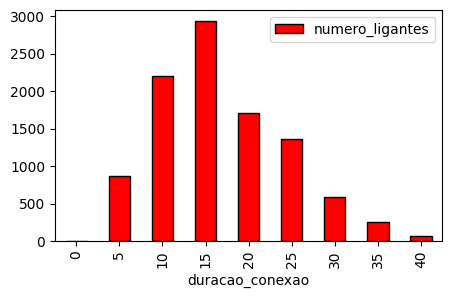

In [55]:
df_duracoes.plot(x="duracao_conexao",
                 y="numero_ligantes",
                 kind="bar",
                 figsize=(5, 3),
                 color="red",
                 edgecolor="black")

<Axes: xlabel='percentagem_acumulada', ylabel='duracao_conexao'>

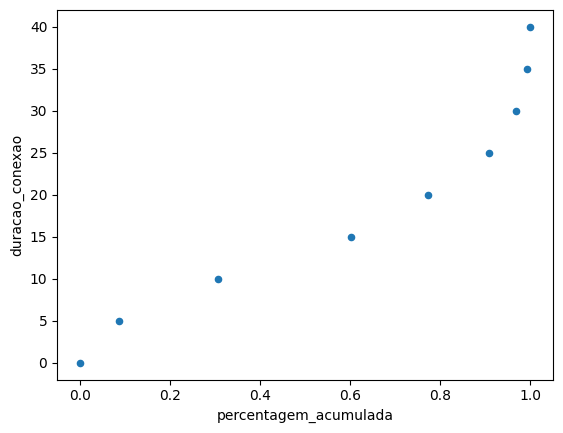

In [56]:
df_duracoes.plot(
    x="percentagem_acumulada",
    y="duracao_conexao",
    kind="scatter",
)

In [57]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [58]:
x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)
print(x[::100].round(1))
print(y[::100].round(1))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ -0.2   5.9   7.9   9.3  11.3  13.8  16.   17.6  19.4  24.2]


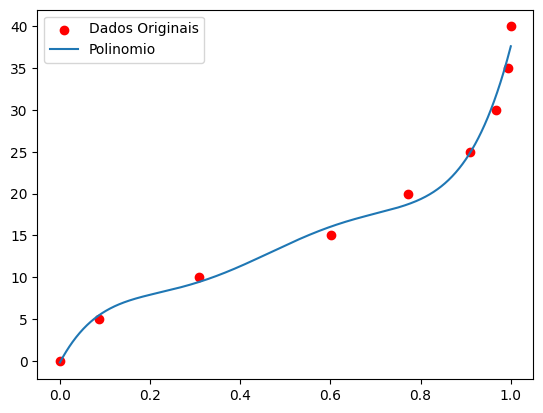

In [59]:
percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais")
plt.plot(x, y, label="Polinomio")
plt.legend()
plt.show()

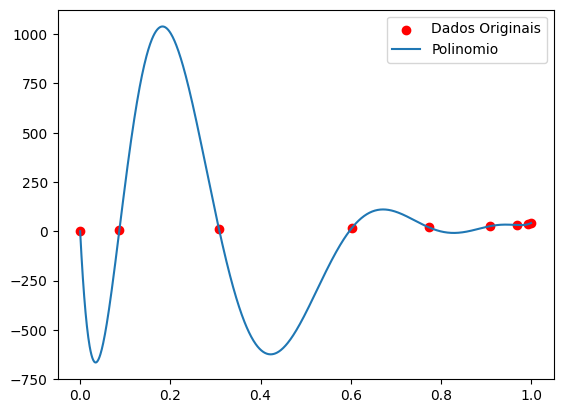

In [60]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    8
)
# ----------------------------------------------------------------------

x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x)

# ----------------------------------------------------------------------

percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais")
plt.plot(x, y, label="Polinomio")
plt.legend()
plt.show()

In [61]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [62]:
np.polyval(coefs, 0)

-0.20625385920720873

In [63]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3])

array([-0.20625386,  5.90943916,  7.89703842,  9.28356129])

In [64]:
tempos_aleatorios = []
for _ in range(10_000):
    alpha = np.random.random()
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)

14.367366537453213

In [65]:
df_tabela_ligantes.loc[0]

rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
Name: 0, dtype: object

In [66]:
qtd_ligacoes = \
    df_tabela_ligantes.loc[0, "numero_medio_ligantes"]
qtd_ligacoes

601

In [67]:
np.random.seed(0)
momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723])

In [68]:
df_duracoes.loc[0,"duracao_conexao"]

0

In [69]:
df_duracoes.iloc[0, 0]

0

In [70]:
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723])

In [71]:
momentos_ligacoes.sort()
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13])

In [72]:
atendentes: list[dict] = []

In [73]:
np.set_printoptions(legacy="1.13")

In [74]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [75]:
np.random.seed(0)
aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
print(tempo_duracao)

14.9651548698


In [76]:
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)

atendentes

[{'inicio': 0, 'fim': 14.965154869825788}]

In [77]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [78]:
espera_maxima = 10
tempo_descanso = 0

In [79]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

11.718611909935627

In [80]:
for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if momento_ligacao + espera_maxima < fim:
        ocupado = True
    else:
        ocupado = False

    if not ocupado:

        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim
        
        atendente["fim"] = atendente["inicio"] + tempo_duracao
        break
else:

    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)
atendentes

[{'inicio': 0, 'fim': 14.965154869825788},
 {'inicio': 3, 'fim': 14.718611909935627}]

In [81]:
momento_ligacao = momentos_ligacoes[2]
momento_ligacao

4

In [82]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649847124},
 {'inicio': 906, 'fim': 917.8694522841929},
 {'inicio': 909, 'fim': 917.37356632865908},
 {'inicio': 900, 'fim': 912.04701461232753},
 {'inicio': 906, 'fim': 913.54143974651595},
 {'inicio': 906, 'fim': 909.21101754494043},
 {'inicio': 907, 'fim': 923.65667308553873},
 {'inicio': 898, 'fim': 910.8046881523278},
 {'inicio': 892, 'fim': 918.91345868734425},
 {'inicio': 892, 'fim': 899.69624954326127},
 {'inicio': 895, 'fim': 921.10612200644232},
 {'inicio': 894, 'fim': 924.69074240731493},
 {'inicio': 894, 'fim': 912.97138605250916},
 {'inicio': 895, 'fim': 911.50408246059612},
 {'inicio': 896, 'fim': 906.2410325325028},
 {'inicio': 896, 'fim': 913.60372670220875},
 {'inicio': 899, 'fim': 917.10414351140616},
 {'inicio': 899, 'fim': 928.75678691456403},
 {'inicio': 899, 'fim': 903.0800609217257},
 {'inicio': 899, 'fim': 906.40232584614864}]

In [83]:
len(atendentes)

20

In [84]:
np.random.permutation([1, 2, 3, 4, 5, 6, 7, 8])

array([2, 1, 5, 4, 8, 6, 3, 7])

In [85]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 899, 'fim': 909.2955984382935},
 {'inicio': 900, 'fim': 910.8933443088107},
 {'inicio': 899, 'fim': 932.21236757046836},
 {'inicio': 909, 'fim': 917.53861755804292},
 {'inicio': 904, 'fim': 920.23396462120218},
 {'inicio': 899, 'fim': 908.85265704311962},
 {'inicio': 867, 'fim': 894.9962068898227},
 {'inicio': 901, 'fim': 917.6665794050017},
 {'inicio': 907, 'fim': 915.17518229721816},
 {'inicio': 906, 'fim': 913.65133331309642},
 {'inicio': 896, 'fim': 906.82228408259152},
 {'inicio': 892, 'fim': 907.66966275984714},
 {'inicio': 882, 'fim': 901.1383790602481},
 {'inicio': 883, 'fim': 902.83508526845742},
 {'inicio': 814, 'fim': 843.61932083750025},
 {'inicio': 899, 'fim': 907.73089614698119},
 {'inicio': 896, 'fim': 912.80887286969016},
 {'inicio': 906, 'fim': 930.77650857786512},
 {'inicio': 906, 'fim': 914.04967842263852}]

In [86]:
len(atendentes)

19

In [87]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [97]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []
for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [ ]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560
